Correlation matrix:
          X1        X2        X3         y
X1  1.000000  0.999394  0.190840 -0.974708
X2  0.999394  1.000000  0.190352 -0.975914
X3  0.190840  0.190352  1.000000 -0.018472
y  -0.974708 -0.975914 -0.018472  1.000000


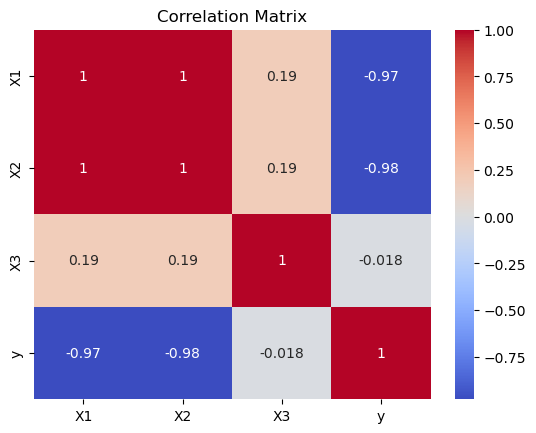


Model with all variables:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1713.
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.42e-83
Time:                        23:23:57   Log-Likelihood:                -127.46
No. Observations:                 100   AIC:                             262.9
Df Residuals:                      96   BIC:                             273.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0875    

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Set seed for reproducibility
np.random.seed(42)

# 2. Create synthetic data
n = 100
X1 = np.random.normal(0, 1, n)
X2 = 3 * X1 + np.random.normal(0, 0.1, n)  # X2 is highly correlated with X1
X3 = np.random.normal(0, 1, n)
noise = np.random.normal(0, 1, n)
y = 5 + 2*X1 - 3*X2 + 1*X3 + noise  # true coefficients, but X1 and X2 are collinear

# 3. Construct DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# 4. Check correlations
print("Correlation matrix:")
print(df.corr())

# Optional: visualize heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 5. Fit model with all variables
X_all = df[['X1', 'X2', 'X3']]
X_all = sm.add_constant(X_all)
model_all = sm.OLS(df['y'], X_all).fit()
print("\nModel with all variables:")
print(model_all.summary())

In [3]:
# 6. Now drop one of the correlated variables (say X2)
X_reduced = df[['X1', 'X3']]
X_reduced = sm.add_constant(X_reduced)
model_reduced = sm.OLS(df['y'], X_reduced).fit()
print("\nModel after dropping X2 (which is highly correlated with X1):")
print(model_reduced.summary())


Model after dropping X2 (which is highly correlated with X1):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2282.
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           2.75e-82
Time:                        23:24:24   Log-Likelihood:                -133.79
No. Observations:                 100   AIC:                             273.6
Df Residuals:                      97   BIC:                             281.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------